In [1]:
#========= Determine relationship of each i/p var with target i.e Status variable

#=========Label Encode the data

#==========Plot Correlation Matrix 

#=========No Standerdization : Since all the columns are categorical in nature ,data has not been standerdized

#=======Modelling
SVM          : 70.3
RandomForest : 71.4
XGBClassifer : 74

## 1. Data exploration insights – Sales effectiveness.
## 2. ML model to predict the Lead Category (High Potential , Low Potential)

In [1]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from collections import Counter
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as 


from scipy import stats
import warnings
warnings.filterwarnings("ignore")

db_host = '18.136.56.185'
username ='dm_team2'
pwd='dm_team1118#'
db_name='project_sales'


In [2]:
#Connecting to SQL DB
conn =create_engine('mysql+pymysql://'+username+':'+pwd+'@'+db_host+'/'+db_name)
conn.table_names()

OperationalError: (pymysql.err.OperationalError) (2003, "Can't connect to MySQL server on '18.136.56.185' (timed out)")
(Background on this error at: http://sqlalche.me/e/e3q8)

In [4]:
query ='select * from data '
df1 =pd.read_sql(query,conn)
df1.head(2)


,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open


In [5]:
df1.describe()
df1.columns



Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

### EDA

In [6]:
#Find all columns with empty string values
list = [ 'Product_ID', 'Source', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status']


for i in list :
   #print( "Column "+i +" : " ,Counter( df1[i]))
   print( "The empty string values in column "+i+" is : ",df1[i].loc[df1[i]==''].count())
   print("------------------------------------")

The empty string values in column Product_ID is :  58
------------------------------------
The empty string values in column Source is :  17
------------------------------------
The empty string values in column Sales_Agent is :  23
------------------------------------
The empty string values in column Location is :  58
------------------------------------
The empty string values in column Delivery_Mode is :  0
------------------------------------
The empty string values in column Status is :  0
------------------------------------


##### Dropping columns Created,Email and Mobile since its not  significant enough to predict sales

In [7]:
df1.drop(columns=['Created','EMAIL','Mobile'] ,inplace=True,axis=1)
df1.columns

Index(['Product_ID', 'Source', 'Sales_Agent', 'Location', 'Delivery_Mode',
       'Status'],
      dtype='object')

In [8]:
df =df1
df.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,,Website,Sales-Agent-11,,Mode-5,Open
1,,Website,Sales-Agent-10,,Mode-5,Open
2,,Website,Sales-Agent-10,,Mode-5,Open
3,,Website,Sales-Agent-10,,Mode-5,Open
4,,Website,Sales-Agent-10,,Mode-5,Open


### Since all the features are categorical in nature Normality and Scaling(Standardization ) is not required

### Column Status


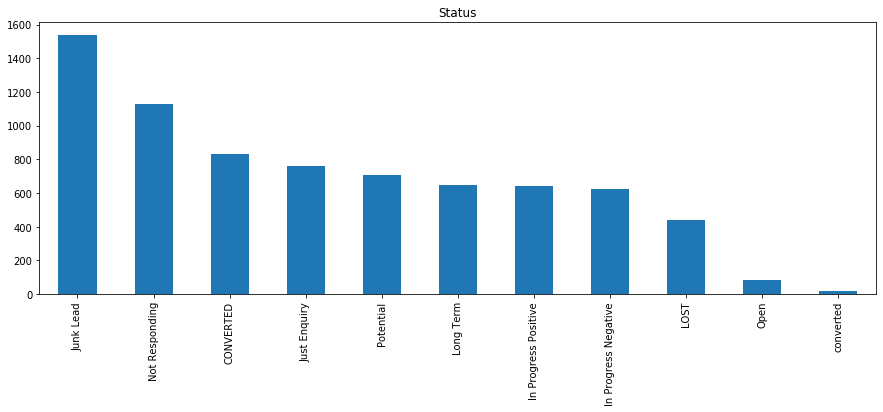

In [9]:
#Plotting to undersatnd diff categories of status column
plt.figure(figsize=(15, 5))
plt.title('Status')
df.Status.value_counts().plot.bar()

##### Group the status into below categories
#'0_Not_Potential' :['In Progress Negative','Junk Lead','LOST','Not Responding' ]
#'1_Potential' : ['In Progress Positive','Potential'],
#'2_PotentialLongterm' : ['Long Term'] ,
#'3_HighPotential':['CONVERTED','converted']

Counter({0: 4573, 1: 1351, 3: 852, 2: 646})


[Text(0, 0, '0_Not_Potential'),
 Text(0, 0, '1_Potential'),
 Text(0, 0, '2_PotentialLongterm'),
 Text(0, 0, '3_HighPotential')]

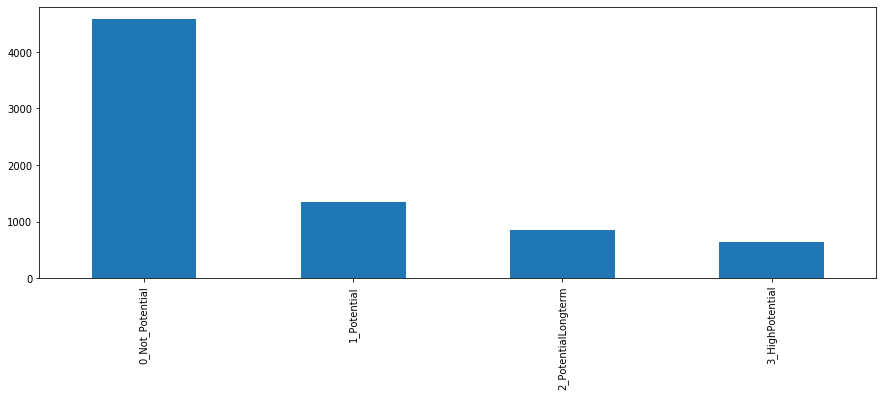

In [10]:
df.loc[((df.Status=='In Progress Negative') | (df.Status=='Junk Lead') | (df.Status=='LOST') | (df.Status=='Not Responding') | (df.Status=='Just Enquiry') | (df.Status=='Open')),'Status' ] = 0
df.loc[((df.Status=='In Progress Positive') | (df.Status=='Potential')),'Status'] = 1
df.loc[((df.Status=='Long Term')),'Status'] = 2
df.loc[((df.Status=='CONVERTED') | (df.Status=='converted')),'Status'] = 3

print(Counter(df.Status))
xlbl =('0_Not_Potential','1_Potential','2_PotentialLongterm','3_HighPotential')


plt.figure(figsize=(15, 5))
fig = df.Status.value_counts().plot.bar()
fig.set_xticklabels(xlbl)


In [11]:
df['Status']

0       0
1       0
2       0
3       0
4       0
       ..
7417    0
7418    0
7419    0
7420    0
7421    3
Name: Status, Length: 7422, dtype: object

# Analyse the Leads %

From the below Pie Chart we can conclude that 61 % of the leads are not Potential leads

In [12]:
Count_0_Not_Potential = df['Status'].loc[(df['Status']== 0)].count()
print("Count of 0_Not_Potential : ",Count_0_Not_Potential)  

Count_1_Potential = df['Status'].loc[(df['Status']== 1)].count()
print("Count of 1_Potential: ",Count_1_Potential) 

Count_2_PotentialLongterm = df['Status'].loc[(df['Status']== 2)].count()
print("Count of 2_PotentialLongterm : ",Count_2_PotentialLongterm) 

Count_3_HighPotential = df['Status'].loc[(df['Status']== 3 ) ].count()
print("Count of 3_HighPotential : ",Count_3_HighPotential) 

Count of 0_Not_Potential :  4573
Count of 1_Potential:  1351
Count of 2_PotentialLongterm :  646
Count of 3_HighPotential :  852


In [13]:
'''
'0_Not_Potential' : 4573
'1_Potential' : 1351,
'2_PotentialLongterm' : 646 ,
'3_HighPotential' :852
'''
Plabels =['0_Not_Potential','1_Potential','2_PotentialLongterm','3_HighPotential']
Pdata = [4573,1351,646,852]

#Actual numbers
Counter(df.Status)

Counter({0: 4573, 1: 1351, 3: 852, 2: 646})

([<matplotlib.patches.Wedge at 0x21c85dc0588>,
 [Text(-0.3598414315168364, -1.0394778228340968, '0_Not_Potential'),
  Text(0.9057160994016799, 0.6242422184413728, '1_Potential'),
  Text(0.1339177014339886, 1.091817772910222, '2_PotentialLongterm'),
  Text(-0.5389417756999525, 0.9589274020515746, '3_HighPotential')],
 [Text(-0.19627714446372893, -0.5669879033640528, '61.6%'),
  Text(0.4940269633100071, 0.34049575551347605, '18.2%'),
  Text(0.07304601896399378, 0.5955369670419393, '8.7%'),
  Text(-0.29396824129088317, 0.5230513102099498, '11.5%')])

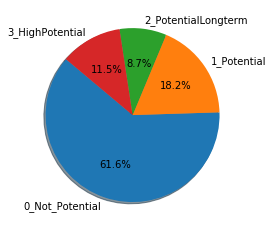

In [14]:
plt.pie(Pdata ,labels=Plabels,autopct='%1.1f%%', shadow=True, startangle=140 )

# Data Cleaning

## Status Column

In [15]:
Counter(df.Status)

Counter({0: 4573, 1: 1351, 3: 852, 2: 646})

In [16]:
# Grouping Status data column into Potential and  Not-Potential

df.loc[((df.Status== 1) | (df.Status==3)),'Status' ] = 1 # Potential
df.loc[((df.Status== 0) | (df.Status==2)),'Status' ] = 0 #NonPotential

Counter(df.Status)

Counter({0: 5219, 1: 2203})

## Column Product_ID 

Replacing '' values with mode of Product_ID column


In [17]:
print(Counter(df.Product_ID))

df['Product_ID'] = np.where((df['Product_ID'] == ''),(df.loc[:,'Product_ID'].mode()),df['Product_ID'])
print("=======================")
print(Counter(df.Product_ID))

Counter({'18': 1711, '15': 1518, '19': 1189, '9': 992, '27': 739, '5': 487, '10': 168, '1': 105, '20': 102, '25': 90, '21': 66, '': 58, '2': 38, '12': 36, '26': 31, '14': 27, '11': 12, '22': 8, '3': 7, '17': 7, '6': 7, '8': 6, '13': 5, '24': 3, '16': 3, '23': 2, '0': 2, '28': 1, '7': 1, '4': 1})
Counter({'18': 1769, '15': 1518, '19': 1189, '9': 992, '27': 739, '5': 487, '10': 168, '1': 105, '20': 102, '25': 90, '21': 66, '2': 38, '12': 36, '26': 31, '14': 27, '11': 12, '22': 8, '3': 7, '17': 7, '6': 7, '8': 6, '13': 5, '24': 3, '16': 3, '23': 2, '0': 2, '28': 1, '7': 1, '4': 1})


### Column "Source"

#Source : forward filling the 7 empty string values


In [18]:
print(Counter(df.Source))

df['Source'] = np.where((df['Source'] == ''),np.nan,df ['Source'])
df['Source'].ffill(inplace=True)
print("=======================")
print(Counter(df.Source))

Counter({'Call': 2547, 'Live Chat-Direct': 1834, 'Website': 1594, 'Live Chat-Google Organic': 274, 'Live Chat -PPC': 249, 'Live Chat-Blog': 237, 'Customer Referral': 180, 'US Website': 137, 'Just Dial': 56, 'Existing Client': 51, 'Live Chat-CPC': 50, 'Personal Contact': 50, 'By Recommendation': 32, 'CRM form': 23, 'Existing Customer': 22, 'Live Chat-Google Ads': 21, 'Campaign': 19, '': 17, 'E-mail Campaign': 12, 'Live Chat-Adwords Remarketing': 7, 'Live Chat-Quora': 2, 'Other': 2, 'SMS Campaign': 2, 'Live Chat-Youtube': 2, 'E-Mail Message': 1, 'Live Chat-Justdial': 1})
Counter({'Call': 2548, 'Live Chat-Direct': 1839, 'Website': 1603, 'Live Chat-Google Organic': 275, 'Live Chat -PPC': 249, 'Live Chat-Blog': 237, 'Customer Referral': 180, 'US Website': 137, 'Just Dial': 56, 'Existing Client': 51, 'Personal Contact': 51, 'Live Chat-CPC': 50, 'By Recommendation': 32, 'CRM form': 23, 'Existing Customer': 22, 'Live Chat-Google Ads': 21, 'Campaign': 19, 'E-mail Campaign': 12, 'Live Chat-Adwor

## Column "Sales_Agent"
Replace empty string with the mode value

In [19]:
print(Counter(df.Sales_Agent))

df['Sales_Agent'] = np.where((df['Sales_Agent'] == ''),(df.loc[:,'Sales_Agent'].mode()),df['Sales_Agent'])
print("=======================")
print(Counter(df.Sales_Agent))

Counter({'Sales-Agent-4': 1500, 'Sales-Agent-11': 1420, 'Sales-Agent-5': 1190, 'Sales-Agent-9': 879, 'Sales-Agent-3': 781, 'Sales-Agent-7': 736, 'Sales-Agent-2': 389, 'Sales-Agent-12': 269, 'Sales-Agent-6': 114, 'Sales-Agent-8': 68, 'Sales-Agent-10': 49, '': 23, 'Sales-Agent-1': 4})
Counter({'Sales-Agent-4': 1523, 'Sales-Agent-11': 1420, 'Sales-Agent-5': 1190, 'Sales-Agent-9': 879, 'Sales-Agent-3': 781, 'Sales-Agent-7': 736, 'Sales-Agent-2': 389, 'Sales-Agent-12': 269, 'Sales-Agent-6': 114, 'Sales-Agent-8': 68, 'Sales-Agent-10': 49, 'Sales-Agent-1': 4})


## Column "Location"

In [20]:
print(Counter(df.Location))

df['Location'] = np.where((df['Location'] == ''),(df.loc[:,'Location'].mode()),df['Location'])
print("=======================")
print(Counter(df.Location))


Counter({'Other Locations': 2500, 'Bangalore': 2084, 'Chennai': 909, 'Hyderabad': 528, 'Delhi': 471, 'Mumbai': 402, 'Pune': 142, 'UAE': 79, '': 58, 'Trivandrum': 58, 'Kolkata': 55, 'USA': 45, 'UK': 41, 'AUSTRALIA': 25, 'Singapore': 17, 'Malaysia': 4, 'EUROPE': 3, 'Howrah': 1})
Counter({'Other Locations': 2558, 'Bangalore': 2084, 'Chennai': 909, 'Hyderabad': 528, 'Delhi': 471, 'Mumbai': 402, 'Pune': 142, 'UAE': 79, 'Trivandrum': 58, 'Kolkata': 55, 'USA': 45, 'UK': 41, 'AUSTRALIA': 25, 'Singapore': 17, 'Malaysia': 4, 'EUROPE': 3, 'Howrah': 1})


## Column "Delivery_mode"

In [21]:
Counter(df['Delivery_Mode'])

Counter({'Mode-5': 2975,
         'Mode-1': 2627,
         'Mode-3': 1688,
         'Mode-2': 11,
         'Mode-4': 121})

# EDA

### Visualize Product_ID wrt Status

Insights drawn : 
 * The Product_ID 15,18,19,9,27,5 : Generates higher number of 'non potential leads'
 * The Product_ID 19,5,27,19,28 : Generates higher number of 'potential leads'
 * The Product_ID 8,7,6,4,3,28,25,23,22,17,16: Failed to generates any 'leads'

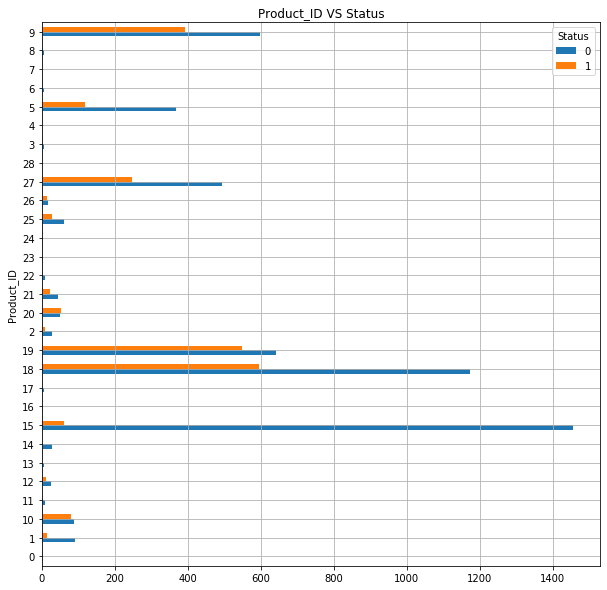

In [22]:
rcParams['figure.figsize'] =10,10 
crosstab_pid = pd.crosstab([df.Product_ID],df.Status)
crosstab_pid.plot(kind='barh',stacked=False,grid=True ,title='Product_ID VS Status')


### Visualize Source wrt Status

Insights drawn :
    * Source "Call" : Produces highest number both wrt 'potential leads ' and 'non potential leads'
    * SOurces "Live Chat","Website": Producing reasonable ammount leads
    * Sources  'Just Dail','Youtube' : Though these are paid sources but failed to generate any leads hence these sources should be taken care to imporve else could stop investing in these sources and use that investment in any other tasks.
    

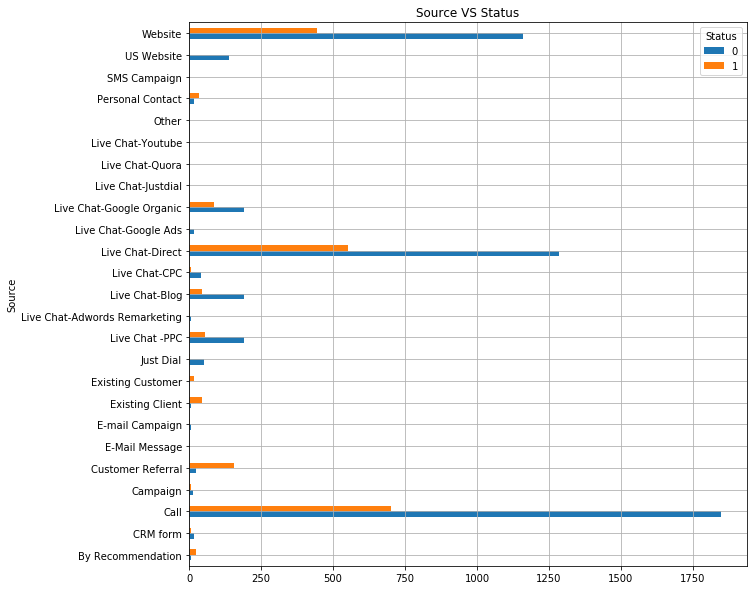

In [23]:
rcParams['figure.figsize'] =10,10 
crosstab_pid = pd.crosstab([df.Source],df.Status)
crosstab_pid.plot(kind='barh',stacked=False,grid=True ,title='Source VS Status')

### Visualize Sales_Agent wrt Status

Insights drawn:
    * SA 4,5,11 : Generates both Potential n non potential leads but likely into more maximum non-potential leads
    * SA 1  : Has not generated anay leads
    * SA 9 : Generates good ammount of potential leads than non-potential leads
    * Measures should be taken in evaluating performance of the Sales_Agents to improve the lead generation

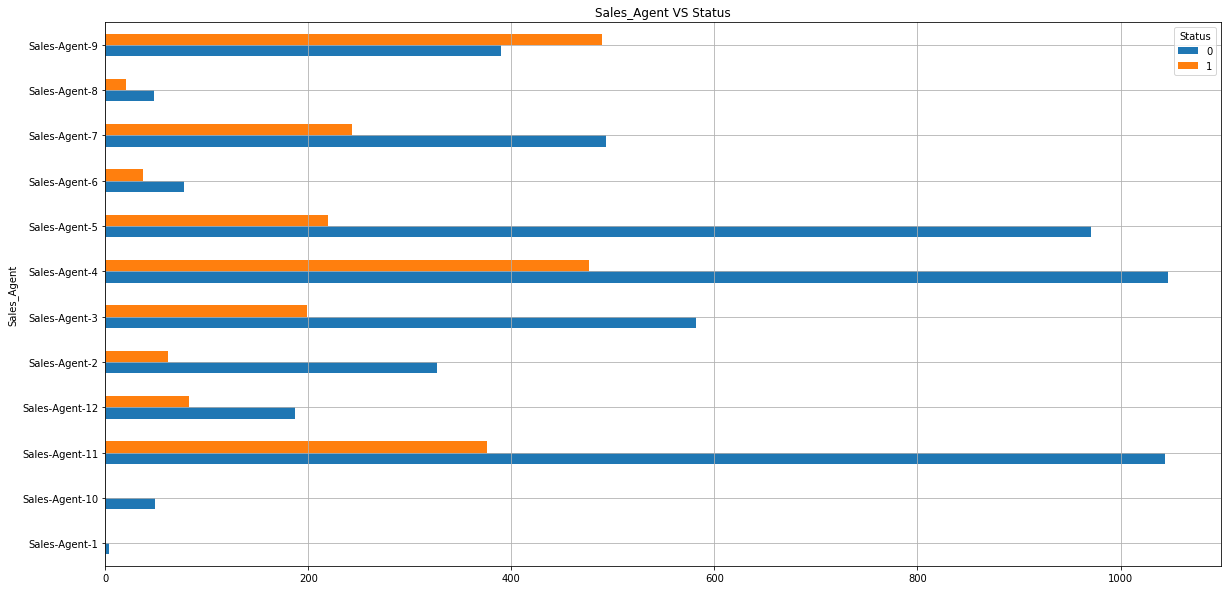

In [24]:
rcParams['figure.figsize'] =20,10 
crosstab_pid = pd.crosstab([df.Sales_Agent],df.Status)
crosstab_pid.plot(kind='barh',stacked=False,grid=True ,title='Sales_Agent VS Status')

### Visualize Location wrt Status

Insights drawn:
    * Location "Banglore",'Delhi','Chennai' : Generating good ammount of leads
    * Location "Other Locations" : Generates maximum non potential leads . It should be taken care to specify the Locations properly ,instead of assigning as a 'Other Location',so that can better understand the locations ,and measures can be taken to improve lead geneartion
    * Locations "Australia","Singapore",'UAE',"Thaiwan","UK","US" : Generating  less number of  leads.
    * Few locations  failed to generate a single lead ,it would definately leads to the loss .Hence should identify the actuall problems facing by these locations n resolve it else relocate to better places

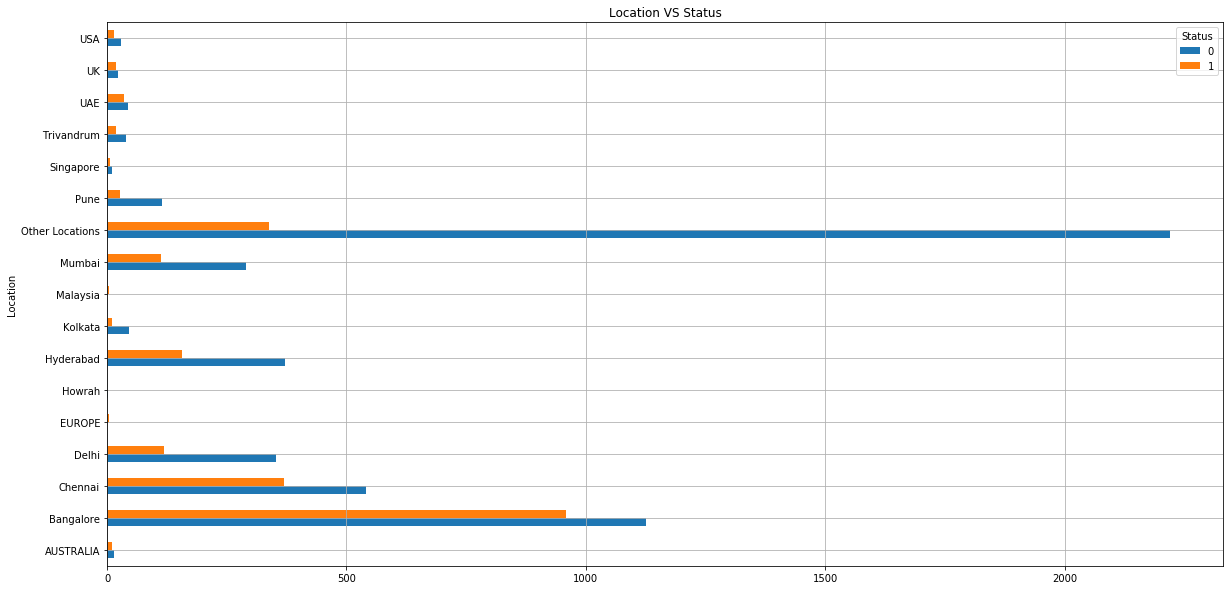

In [25]:
rcParams['figure.figsize'] =20,10 
crosstab_pid = pd.crosstab([df.Location],df.Status)
crosstab_pid.plot(kind='barh',stacked=False,grid=True ,title='Location VS Status')


 ### Visualise Delivery_Mode wrt Status
 
 Insights Drawn :
  * Delivery_Mode 1,2,3 : Performing better in generaing leads
  * Delivery_Mode 2 : Is relatively less efficcinet in genetaing the leads ,hence the mode should be care to improve the efficiency
  * Delivery_Mode 5 : Though generated good ammount of leads but 80% are non-potential.

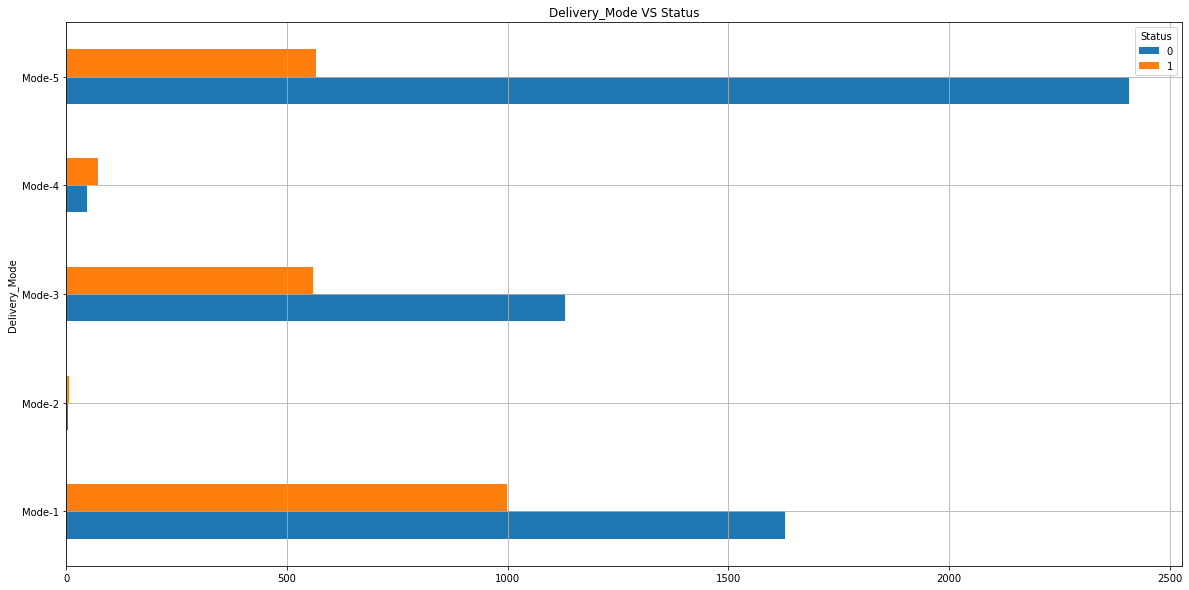

In [26]:
rcParams['figure.figsize'] =20,10 
crosstab_pid = pd.crosstab([df.Delivery_Mode],df.Status)
crosstab_pid.plot(kind='barh',stacked=False,grid=True ,title='Delivery_Mode VS Status')

## Label Encoding the data

In [27]:
encoder =LabelEncoder()

col_list=df.columns

for i in col_list:
    #df[i]=df[i].astype('str')
    df[i]= encoder.fit_transform(df[i])

### Check Multi Collinearity - using correlation on predictor continours variable

In [1]:
cormat = df.corr()
print(cormat)
plt.figure(figsize=(8,8))
sb.heatmap(cormat,annot=True,cmap="Blues")



NameError: name 'df' is not defined

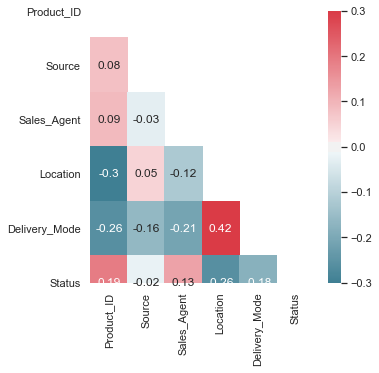

In [29]:
# pearsosn Corrleation : Continous variables
# Spearman correlation to test multicolineaarity among categorical variables
#Note : since Chi2 test has been done we can skip this
    
corr_list = df.corr(method='spearman').round(2)
sb.set(style='white')
mask = np.zeros_like(corr_list,dtype=np.bool)
mask[np.triu_indices_from(mask)] =True

rcParams['figure.figsize'] =5,5
sb.heatmap(corr_list ,annot=True,mask=mask,cmap=sb.diverging_palette(220,10,as_cmap=True),vmax=0.3)

# where evenr the value of r>0.75 ,it means very high correlation,so we can delete that
#In this case no strong correlation so no multicollinearity
# We can conclude that there is no multicollinearity among the categorical vars

## Checking if each caategorical var has a statistically significant association with caategorical outcome var

### Below sample is just for one we have to do for every combination of i/p and target var

In [30]:
# if P < 0.05 Null Hypothesis : there is  no assocaition b/w the var
#P> 0.05 cant reject Ho and dependency exists
#print(pd.crosstab(df.Product_ID ,df.Status))

col_list = df.iloc[:,:-1]
for c in col_list:
    crosstab = pd.crosstab(df[c] ,df.Status,margins = True)
    chi2,P,dof ,expected = stats.chi2_contingency(crosstab)
    print("======================")
    print("Chi  for " ,c ,": ",chi2)
    print("P-Value " ,c ,": ",P)
    print("dof :" ,c ,": ",dof)  # Degree of Freedom
#print("expected : ",expected)
print(crosstab)

Chi  for  Product_ID :  794.2020178065721
P-Value  Product_ID :  7.210693068389772e-130
dof : Product_ID :  58
Chi  for  Source :  576.5832849875077
P-Value  Source :  1.1950737812701062e-90
dof : Source :  50
Chi  for  Sales_Agent :  433.50474054906374
P-Value  Sales_Agent :  9.607173972966126e-77
dof : Sales_Agent :  24
Chi  for  Location :  699.1041078910192
P-Value  Location :  3.866590230166336e-125
dof : Location :  34
Chi  for  Delivery_Mode :  314.98404735488145
P-Value  Delivery_Mode :  1.051976829264423e-61
dof : Delivery_Mode :  10
Status            0     1   All
Delivery_Mode                  
0              1629   998  2627
1                 5     6    11
2              1129   559  1688
3                48    73   121
4              2408   567  2975
All            5219  2203  7422


In [31]:
col_list = df.iloc[:,:-1]
col_list

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
0,10,24,2,10,4
1,10,24,1,10,4
2,10,24,1,10,4
3,10,24,1,10,4
4,10,24,1,10,4
...,...,...,...,...,...
7417,28,2,8,9,3
7418,7,2,3,10,4
7419,24,14,2,1,0
7420,14,1,6,10,0


## Check if each Categorical predictor impacts continuous outcome variable
If the class of predictor is dicotomous use t-test else Anova
Usefull only in case of regression

Should be done for every combination of predictor and outcome. 
All tests which have p-value<0.05,those predictors should be retained and others deleted

# PCA could be done for dimen reduction 
 
 PCA not required in this case

## Feature Creation

 Done based on domain analysis
 * 1.Appropriate bin sized for converting continous var into categorical
 * 2.Combining categories
 * 3.Creating new featires based on linear transformations of other var eg :duration can g got bt diff of 2 dates
 * 4.Usefulness of varibale and metric
 

NA

# Attribute Transformation:

Function that maps the entire set of values of a given attribute to a new set of replacement values such that each of old value can be identified  withone of new values
* 1.SImple funs : x^k ,log(x) ,e^x , |x|
* 2.Standardization(scales are diff) Z-score
* 3.Normalization : Min-Max scale 


## Data Split

In [32]:
X= df.iloc[:,0:-1]
y=df['Status']

X_train,X_test,y_train,y_test =tts(X ,y ,test_size=0.3 ,random_state=10)

In [33]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5195, 5)
(5195,)
(2227, 5)
(2227,)


## Modelling

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import model_selection

from sklearn.metrics import accuracy_score ,confusion_matrix ,classification_report

from sklearn.model_selection import KFold


In [35]:
#prepare models
models =[]
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('SVM',SVC()))
models.append(('XGB',XGBClassifier()))

results=[]
names=[]
output=[]
score ='accuracy'

for name,model in models:
    #kfold = model_selectcion.KFold(n_splits=10 ,random_state=10)
    #and mention param cv=kfold in below line
    cv_results = model_selection.cross_val_score(model,X,y,scoring=score)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    output.append(msg)

#Consider top 3 algorithms gives best accuracy
    print(msg)

LR: 0.716380 (0.015254)
KNN: 0.711800 (0.016779)
CART: 0.696714 (0.016420)
RF: 0.710996 (0.008064)
SVM: 0.720154 (0.010843)
XGB: 0.720292 (0.010414)


[Text(0, 0, 'LR'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'CART'),
 Text(0, 0, 'RF'),
 Text(0, 0, 'SVM'),
 Text(0, 0, 'XGB')]

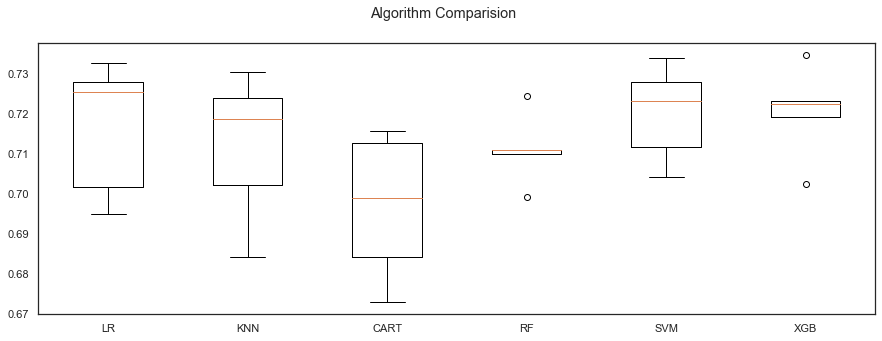

In [36]:
#boxplot algorithm comparision
rcParams['figure.figsize'] =15,5
fig=plt.figure()
fig.suptitle("Algorithm Comparision")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

## Key Observations:

SVM and XGBoost considered for further optimization

### SVM

In [37]:
model1=SVC(C=2 ,gamma=0.11 ,kernel='rbf',random_state=100)
model1.fit(X_train,y_train)

y_predict1= model1.predict(X_test)

accuracy_score(y_test,y_predict1)


0.7274360125729681

from sklearn.model_selection import GridSearchCV

params = { 'C' : [1,5,10],
          'gamma' : [0.1,0.01,0.001],
          'kernel':['rbf','linear','sigmoid']}
cv =GridSearchCV(model1,params)
cv.fit(X_train,y_train)

print("Best Estimators : ",cv.best_estimator_)
print("Best Score : ", cv.best_score_)
print("Best Params : ",cv.best_params_)

### XGBoost

In [38]:
model = XGBClassifier(booster='gbtree',
                       random_state=155,
                       eta=0.11,
                      max_depth=3,
                      gamma=0.01,
                      min_child_weight=3,
                      colsample_bytree=0.5,
                      base_score=0.7,
                      learning_rate=0.2,
                      num_parallel_tree=5
                       )
model.fit(X_train,y_train)
y_predict= model.predict(X_test)
accuracy_score(y_test,y_predict)

0.7620116748989673

In [39]:
print(classification_report(y_test,y_predict))
print(pd.crosstab(y_test,y_predict))


              precision    recall  f1-score   support

           0       0.77      0.94      0.85      1552
           1       0.72      0.35      0.47       675

    accuracy                           0.76      2227
   macro avg       0.75      0.64      0.66      2227
weighted avg       0.76      0.76      0.73      2227

col_0      0    1
Status           
0       1463   89
1        441  234


In [40]:
type(y_train)

y_train_11 =pd.DataFrame(y_train)
y_train_11.columns
Counter(y_train_11.Status)

Counter({0: 3667, 1: 1528})

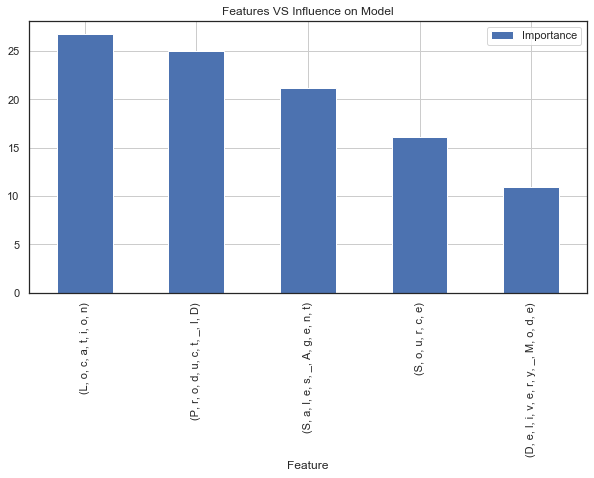

In [41]:
FeatureImportancel =pd.DataFrame({'Feature' : df.iloc[:,:-1] , 'Importance' : model.feature_importances_*100})

FeatureImportancel=FeatureImportancel.sort_values(by='Importance',axis=0,ascending=False)

FeatureImportancel.plot(x='Feature',
                       y='Importance',
                       kind='bar',
                       grid=True,
                       title="Features VS Influence on Model",
                       figsize=(10,5))

In [42]:
#Merge all data into a single Data FRame index to oroginal split row index

#y1_predict = pd.DataFrame(y)

In [43]:
#Define Result lists
y_test = pd.DataFrame(y_test)
y_predict = pd.DataFrame(y_predict ,columns =['y_Predict_Status'])
Proba =model.predict_proba(X_test)
Proba.shape

(2227, 2)

In [44]:
Proba =pd.DataFrame(Proba)
Proba.head()

,0,1
0,0.984188,0.015812
1,0.512792,0.487208
2,0.807018,0.192982
3,0.522130,0.477870
4,0.526411,0.473589


In [45]:
ConsolidatedData1 = np.concatenate([np.array(y_test),np.array(y_predict),np.array(Proba)],axis=1)
ConsolidatedData1 = pd.DataFrame(ConsolidatedData1,columns=['y_test','y_predict','Proba_0','Proba_1'])
ConsolidatedData1 = pd.DataFrame(ConsolidatedData1)
ConsolidatedData1.head()

,y_test,y_predict,Proba_0,Proba_1
0,0.0,0.0,0.984188,0.015812
1,1.0,0.0,0.512792,0.487208
2,0.0,0.0,0.807018,0.192982
3,0.0,0.0,0.522130,0.477870
4,0.0,0.0,0.526411,0.473589


In [46]:
print(pd.crosstab(ConsolidatedData1.y_test,ConsolidatedData1.y_predict))
print(classification_report(ConsolidatedData1.y_test,ConsolidatedData1.y_predict))
ConsolidatedData1.count()

# We could see that Recall is high now 

y_predict   0.0  1.0
y_test              
0.0        1463   89
1.0         441  234
              precision    recall  f1-score   support

         0.0       0.77      0.94      0.85      1552
         1.0       0.72      0.35      0.47       675

    accuracy                           0.76      2227
   macro avg       0.75      0.64      0.66      2227
weighted avg       0.76      0.76      0.73      2227



y_test       2227
y_predict    2227
Proba_0      2227
Proba_1      2227
dtype: int64

In [47]:
#Define Result lists

Accuracy =[]
Recall =[]
Precision=[]
Threshold =[]

#Set new col to zero
ConsolidatedData1['y_Pred_new'] =0

#Loop to evaluate the threshold
for i in range(5,95,1):
    ConsolidatedData1.loc[ConsolidatedData1.Proba_1 > i/100 , 'y_Pred_new']=1
    z = pd.crosstab(ConsolidatedData1.y_test , ConsolidatedData1.y_Pred_new)
    #print(z)
    Threshold.append(i/100)
    Accuracy.append(((z[0][0] + z[1][1])/(z[0][0]+z[0][1]+z[1][0]+z[1][1])) *100)
    Precision.append((z[1][1]/(z[1][0]+z[1][1]))*100)
    Recall.append((z[1][1]/(z[0][1]+z[1][1]))*100)
    ConsolidatedData1['y_Pred_new']=0

#Convert the lists into a single data frame

Result = pd.DataFrame({'Threshold' : Threshold ,
                      'Accuracy' : Accuracy,
                      'Recall':Recall,
                      'Precision':Precision})
Result.loc[Result.Accuracy > 76]

    

,Threshold,Accuracy,Recall,Precision
45,0.5,76.201167,34.666667,72.44582


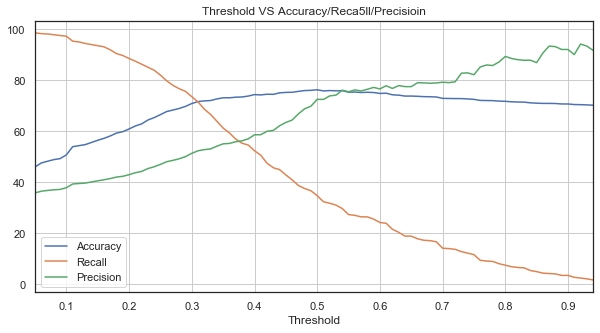

In [48]:
Result.plot(x='Threshold',
           y=['Accuracy','Recall','Precision'],
           kind='line',
           grid=True,
           title='Threshold VS Accuracy/Reca5ll/Precisioin',
           legend=True,
           figsize =(10,5))

#Choose threshold as 0.5 as its giving better accuracy:

## Approach 1: Code for prediction based on custom threshold

Classifications

Use Test Data and optimise for recall .Interpret confusion matrix as below

TP =Potential
TN = Not Potential
FN+TN = Not Sure

In [49]:
#Set threshold to avove choosen value

CustomThreshold =0.2

#Set New prediction column to zero
ConsolidatedData1['y_Pred_new'] =0

#Set ConsolidatedData1 across all the rows have proba>1 threshold to 1
ConsolidatedData1.loc[ConsolidatedData1.Proba_1> CustomThreshold,'y_Pred_new']=1

#Update Appropriate status
ConsolidatedData1['FinalStatus'] =""
ConsolidatedData1.loc[(ConsolidatedData1.y_test==1) & (ConsolidatedData1.y_Pred_new==1) ,'FinalStatus'] ='Potential'
ConsolidatedData1.loc[(ConsolidatedData1.y_test==0) & (ConsolidatedData1.y_Pred_new==0) ,'FinalStatus'] ='NotPotential'
ConsolidatedData1.loc[(ConsolidatedData1.y_test==1) & (ConsolidatedData1.y_Pred_new==0) ,'FinalStatus'] ='NotSure'
ConsolidatedData1.loc[(ConsolidatedData1.y_test==0) & (ConsolidatedData1.y_Pred_new==1) ,'FinalStatus'] ='NotSure'

print(Counter(ConsolidatedData1.FinalStatus))
print(ConsolidatedData1.head())

#ConsolidatedData1.drop('y_Predict_new' ,axis=1,inplace=True)


Counter({'NotSure': 872, 'NotPotential': 758, 'Potential': 597})
   y_test  y_predict   Proba_0   Proba_1  y_Pred_new   FinalStatus
0     0.0        0.0  0.984188  0.015812           0  NotPotential
1     1.0        0.0  0.512792  0.487208           1     Potential
2     0.0        0.0  0.807018  0.192982           0  NotPotential
3     0.0        0.0  0.522130  0.477870           1       NotSure
4     0.0        0.0  0.526411  0.473589           1       NotSure


In [50]:
print("CuttOff = 0.5 : \n" ,pd.crosstab(ConsolidatedData1.y_test ,ConsolidatedData1.y_predict))
print("--------Incresed the precision as we changed the cut-off from 0.5 to 0.2------")
print("\n CuttOff = 0.2 : \n" ,pd.crosstab(ConsolidatedData1.y_test ,ConsolidatedData1.y_Pred_new))
print("\n \n" ,classification_report(ConsolidatedData1.y_test ,ConsolidatedData1.y_Pred_new))

#

CuttOff = 0.5 : 
 y_predict   0.0  1.0
y_test              
0.0        1463   89
1.0         441  234
--------Incresed the precision as we changed the cut-off from 0.5 to 0.2------

 CuttOff = 0.2 : 
 y_Pred_new    0    1
y_test              
0.0         758  794
1.0          78  597

 
               precision    recall  f1-score   support

         0.0       0.91      0.49      0.63      1552
         1.0       0.43      0.88      0.58       675

    accuracy                           0.61      2227
   macro avg       0.67      0.69      0.61      2227
weighted avg       0.76      0.61      0.62      2227



# Approach 2:
Use non potential data +Incorrect classified data from approach 1
Interpret Confusion Matrix as follows

TP : Not Sure
TN : Not Potential (definite not potential)
FN +TN : Not Sure

In [54]:
df_temp = ConsolidatedData1.loc[(ConsolidatedData1.FinalStatus != 'Potential')]
df_temp.count()
df_temp.head()

,y_test,y_predict,Proba_0,Proba_1,y_Pred_new,FinalStatus
0,0.0,0.0,0.984188,0.015812,0,NotPotential
2,0.0,0.0,0.807018,0.192982,0,NotPotential
3,0.0,0.0,0.522130,0.477870,1,NotSure
4,0.0,0.0,0.526411,0.473589,1,NotSure
5,0.0,0.0,0.713818,0.286182,1,NotSure


In [57]:
df3 = df.loc[(df_temp.index)]
df3.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,10,24,2,10,4,0
2,10,24,1,10,4,0
3,10,24,1,10,4,0
4,10,24,1,10,4,0
5,10,24,1,10,4,0


## Modelling

In [60]:
X_2 = df3.iloc[:,:-1]
y_2 =df3.Status

X2_train,X2_test,y2_train,y2_test = tts(X_2,y_2,random_state=100,test_size=0.25)

In [61]:
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(1222, 5)
(408, 5)
(1222,)
(408,)


In [62]:
X2_train.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
1787,10,2,2,1,4
2109,11,14,7,6,2
1013,11,14,9,10,4
232,10,10,5,1,0
1169,11,24,4,9,2


0.7524509803921569

In [64]:
#Assign test to boosting test data
#Since Precision for zero is already 95% we don need any further cut off analysis


#y1_predict = model_2.predict(X1_test)
print(confusion_matrix(y2_test,y2_predict))
print("Accuracy_score :"  ,accuracy_score(y2_test,y2_predict).round(4)*100)

[[192  56]
 [ 45 115]]
Accuracy_score : 75.25


In [66]:
print(classification_report(y2_test,y2_predict))


              precision    recall  f1-score   support

           0       0.81      0.77      0.79       248
           1       0.67      0.72      0.69       160

    accuracy                           0.75       408
   macro avg       0.74      0.75      0.74       408
weighted avg       0.76      0.75      0.75       408



In [73]:
#Merge all data into a singale Data Frame index to original solit row index

y2_predict =pd.DataFrame(y2_predict)
y2_test = pd.DataFrame(y2_test)
Proba =model.predict_proba(X2_test)

ConsolidatedData2 = np.concatenate([np.array(y2_test),np.array(y2_predict),np.array(Proba)],axis=1)
ConsolidatedData2 = pd.DataFrame(ConsolidatedData2)

ConsolidatedData2.columns =['y_test','y_predict1','Proba_0','Proba_1']
ConsolidatedData2.head()


,y_test,y_predict1,Proba_0,Proba_1
0,0.0,0.0,0.892813,0.107187
1,0.0,0.0,0.968812,0.031188
2,0.0,0.0,0.977742,0.022258
3,0.0,0.0,0.690186,0.309814
4,0.0,1.0,0.651003,0.348997


In [68]:
print(ConsolidatedData1.columns)
print(ConsolidatedData2.columns)
Counter(ConsolidatedData2.y_predict1)

Index(['y_test', 'y_predict', 'Proba_0', 'Proba_1', 'y_Pred_new',
       'FinalStatus'],
      dtype='object')
Index(['y_test', 'y_predict1', 'Proba_0', 'Proba_1'], dtype='object')


Counter({0.0: 237, 1.0: 171})

# Final Prediction list(Potential /Non Potential /Not Sure)


In [70]:
print(ConsolidatedData1.shape)
print(ConsolidatedData2.shape)


(2227, 6)
(408, 4)


In [87]:
Approach2Data =pd.DataFrame(ConsolidatedData2.y_predict1)
Prediction =pd.merge(ConsolidatedData1 ,Approach2Data ,how='left',left_index=True,right_index=True)
Prediction[['y_predict1','y_Pred_new','y_test']] = Prediction[['y_predict1','y_Pred_new','y_test']].astype(float)
Prediction.columns
Prediction.head()


,y_test,y_predict,Proba_0,Proba_1,y_Pred_new,FinalStatus,y_predict1
0,0.0,0.0,0.984188,0.015812,0.0,NotPotential,0.0
1,1.0,0.0,0.512792,0.487208,1.0,Potential,0.0
2,0.0,0.0,0.807018,0.192982,0.0,NotPotential,0.0
3,0.0,0.0,0.522130,0.477870,1.0,NotSure,0.0
4,0.0,0.0,0.526411,0.473589,1.0,NotSure,1.0


In [88]:
#update non-potentail
Prediction['FinalStatus'] =''

print(Counter(Prediction.loc[(Prediction.y_test==0.0) &
                              (Prediction.y_predict1==0.0)].y_predict1))
Prediction.loc[(Prediction.y_test==0.0) & (Prediction.y_predict1==0.0),'FinalStatus'] ="NonPotential"
print(Counter(Prediction.loc[(Prediction.y_test==0.0) &
                              (Prediction.y_predict1==0.0)].FinalStatus))


Counter({0.0: 161})
Counter({'NonPotential': 161})


In [89]:
#No records to update
print(Counter(Prediction.loc[(Prediction.y_test==1.0) &
                              (Prediction.y_predict1==1.0)].y_predict1))
Counter(Prediction.FinalStatus)
#Prediction.columns

Counter({1.0: 53})


Counter({'NonPotential': 161, '': 2066})

In [91]:
#Updaate not sure

print(Counter(Prediction.loc[(Prediction.y_test==0.0) &
                              (Prediction.y_predict1==1.0)].y_predict1))
Prediction.loc[(Prediction.y_test==0.0) & (Prediction.y_predict1==1.0),'FinalStatus'] ="NotSure"
print(Counter(Prediction.loc[(Prediction.y_test==0.0) &
                              (Prediction.y_predict1==1.0)].FinalStatus))

Counter(Prediction.FinalStatus)

Counter({1.0: 118})
Counter({'NotSure': 118})


Counter({'NonPotential': 161, '': 1948, 'NotSure': 118})

In [92]:
#Updaate not sure

print(Counter(Prediction.loc[(Prediction.y_test==1) &
                              (Prediction.y_predict1==0)].y_predict1))
Prediction.loc[(Prediction.y_test==1) & (Prediction.y_predict1==0),'FinalStatus'] ="NotSure"
print(Counter(Prediction.loc[(Prediction.y_test==1) &
                              (Prediction.y_predict1==0)].FinalStatus))
Counter(Prediction.FinalStatus)

Counter({0.0: 76})
Counter({'NotSure': 76})


Counter({'NonPotential': 161, 'NotSure': 194, '': 1872})

In [93]:
#Updaate Potential

print(Counter(Prediction.loc[(Prediction.y_test==1) &
                              (Prediction.y_predict1==1)].y_predict1))
Prediction.loc[(Prediction.y_test==1) & (Prediction.y_predict1==1),'FinalStatus'] ="Potential"
print(Counter(Prediction.loc[(Prediction.y_test==1) &
                              (Prediction.y_predict1==1)].FinalStatus))
Counter(Prediction.FinalStatus)

Counter({1.0: 53})
Counter({'Potential': 53})


Counter({'NonPotential': 161, 'NotSure': 194, 'Potential': 53, '': 1819})

In [94]:
#Update Potential 

print(Counter(Prediction.loc[(Prediction.FinalStatus=='Potential')].FinalStatus))
Prediction.loc[(Prediction.FinalStatus=='Potential'),'FinalStatus'] ='Potentail'

print(Counter(Prediction.loc[(Prediction.FinalStatus=='Potential')].FinalStatus))

Counter(Prediction.FinalStatus)

Counter({'Potential': 53})
Counter()


Counter({'NonPotential': 161, 'NotSure': 194, 'Potentail': 53, '': 1819})

In [95]:
Counter(Prediction.FinalStatus)

Counter({'NonPotential': 161, 'NotSure': 194, 'Potentail': 53, '': 1819})

## SMOTE

Applying Smote doesn help in improving the efficiency/accuracy of model

In [96]:
from imblearn.over_sampling import SMOTE
smote =SMOTE(k_neighbors=2)

X_train_sm,y_train_sm =smote.fit_sample(X_train,y_train)

#print(Counter(y_train_sm))
#print(X_train_sm)
type(X_train_sm)
df_temp.columns

Using TensorFlow backend.


Index(['y_test', 'y_predict', 'Proba_0', 'Proba_1', 'y_Pred_new',
       'FinalStatus'],
      dtype='object')

In [97]:
X_train_sm =pd.DataFrame(X_train_sm,columns=['Product_ID', 'Source', 'Sales_Agent', 'Location', 'Delivery_Mode'])
y_train_sm=pd.DataFrame(y_train_sm,columns=['Status'])

In [98]:
print(X_train_sm.shape)
print(y_train_sm.shape)
print(X_train_sm.columns)
print(y_train_sm.columns)

(7334, 5)
(7334, 1)
Index(['Product_ID', 'Source', 'Sales_Agent', 'Location', 'Delivery_Mode'], dtype='object')
Index(['Status'], dtype='object')


In [99]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
                        
scaler = StandardScaler()

scaler.fit(X_train_sm)

X_train_sm =scaler.transform(X_train_sm)
X_train =scaler.transform(X_train)
X_test=scaler.transform(X_test)


In [100]:
grid_model_XGB = XGBClassifier(booster='gbtree',random_state=25,scoring='recall')
grid_model_XGB.fit(X_train_sm,y_train_sm)
y_predict4 = pd.DataFrame(grid_model_XGB.predict(X_test),columns=['Status'])

print(accuracy_score(y_test,y_predict4).round(4)*100)

70.05


## Forecasting Sales

In [149]:
df_forecast = df1.loc[:,['Created','Product_ID']]
type(df_forecast)

pandas.core.frame.DataFrame

In [150]:
df_forecast.Created = pd.to_datetime(df_forecast.Created, dayfirst=True )
df_forecast.dtypes


Created       datetime64[ns]
Product_ID            object
dtype: object

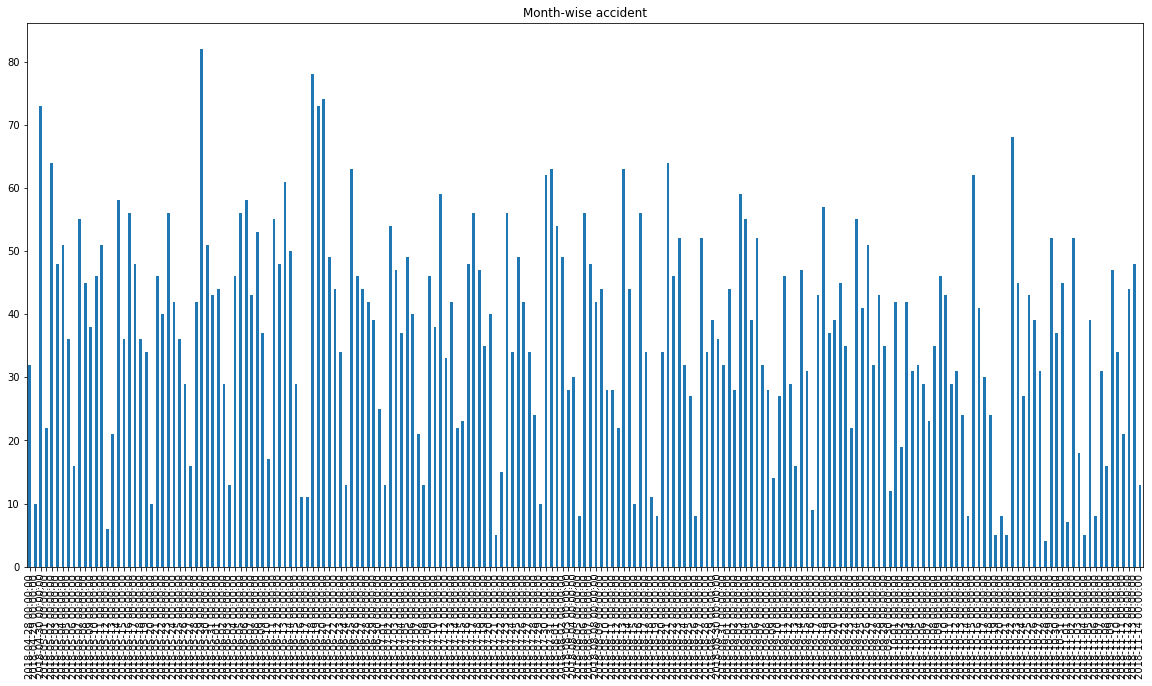

In [151]:
#Visualize the data
df_forecast['Created'].value_counts().sort_index(level = 'year').plot(kind='bar',title='Month-wise accident')

In [156]:
df_forecast['SalesCount'] = df_forecast.groupby('Created')['Product_ID'].transform('count')
df_forecast.drop('Product_ID',axis=1,inplace=True)

KeyError: 'Column not found: Product_ID'

In [159]:
df_forecast =df_forecast.set_index('Created')

KeyError: "None of ['Created'] are in the columns"

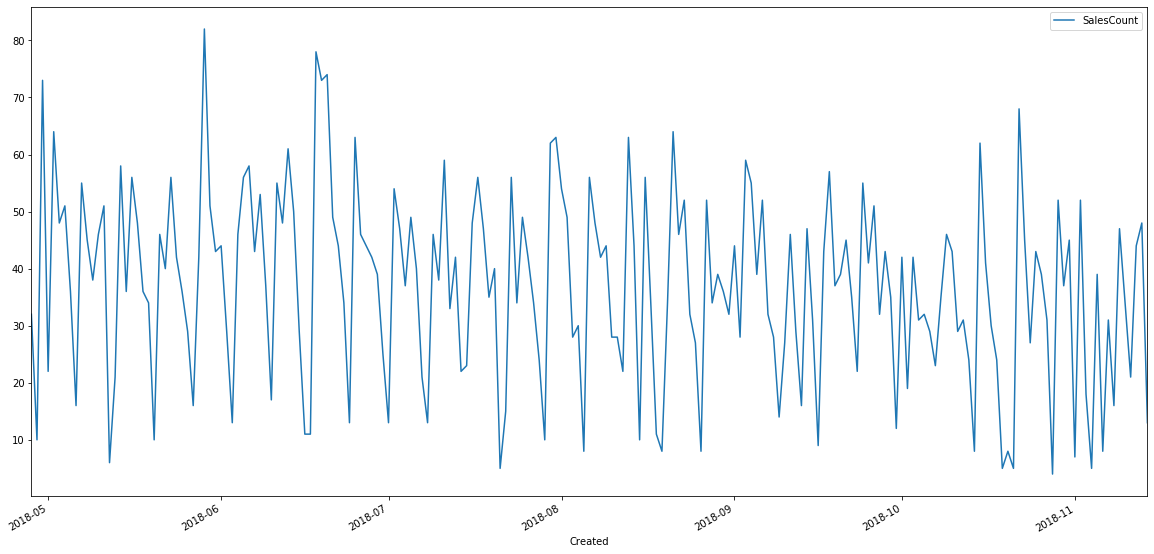

In [177]:
df_forecast.plot()

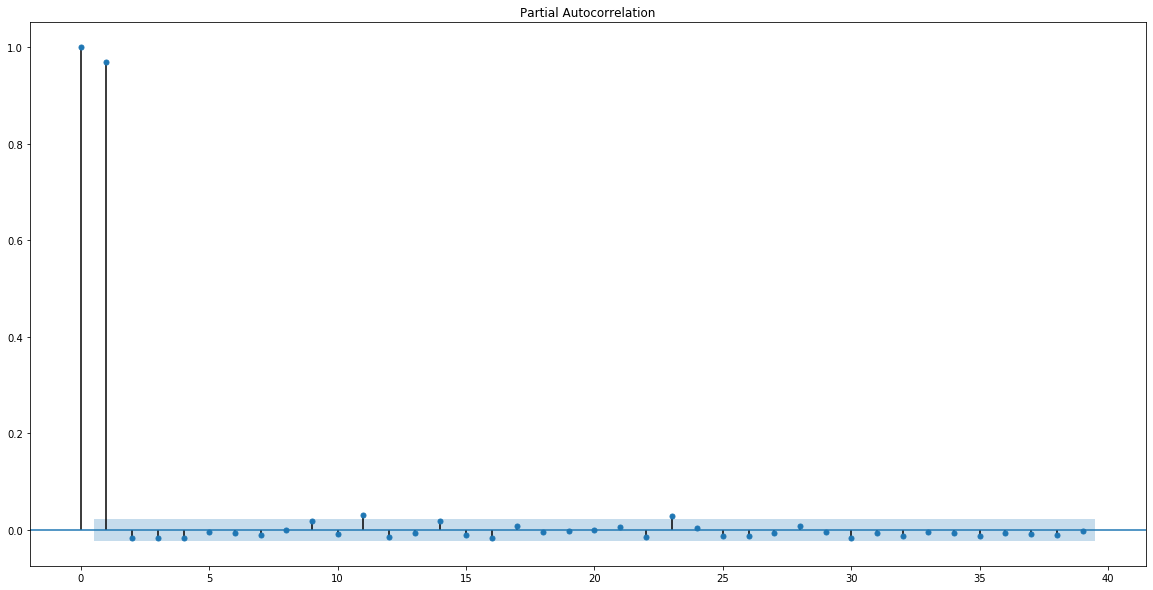

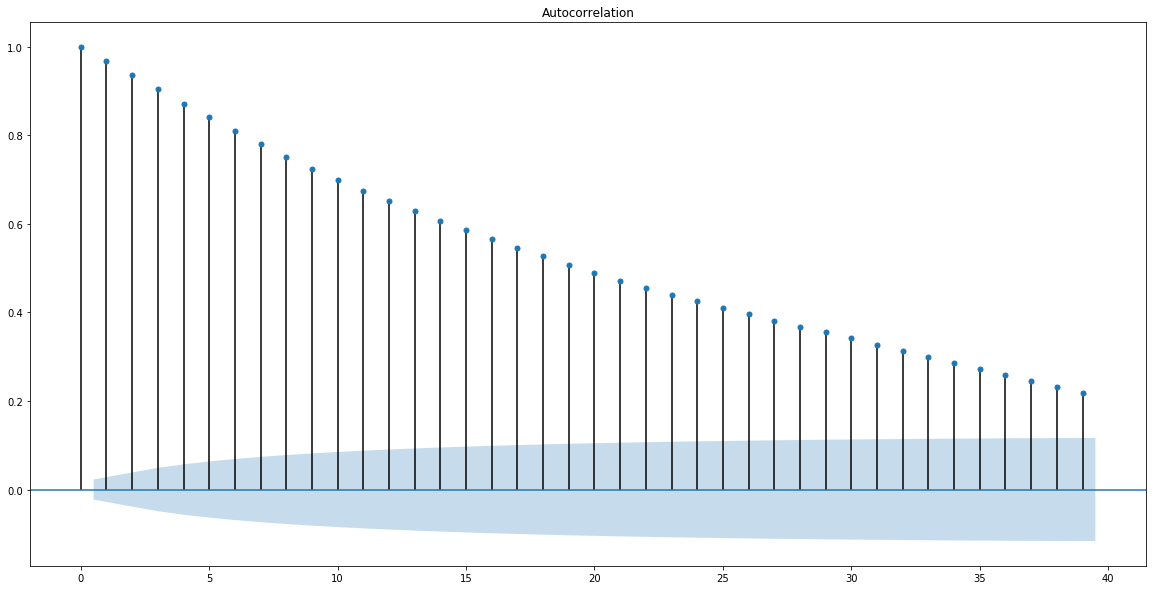

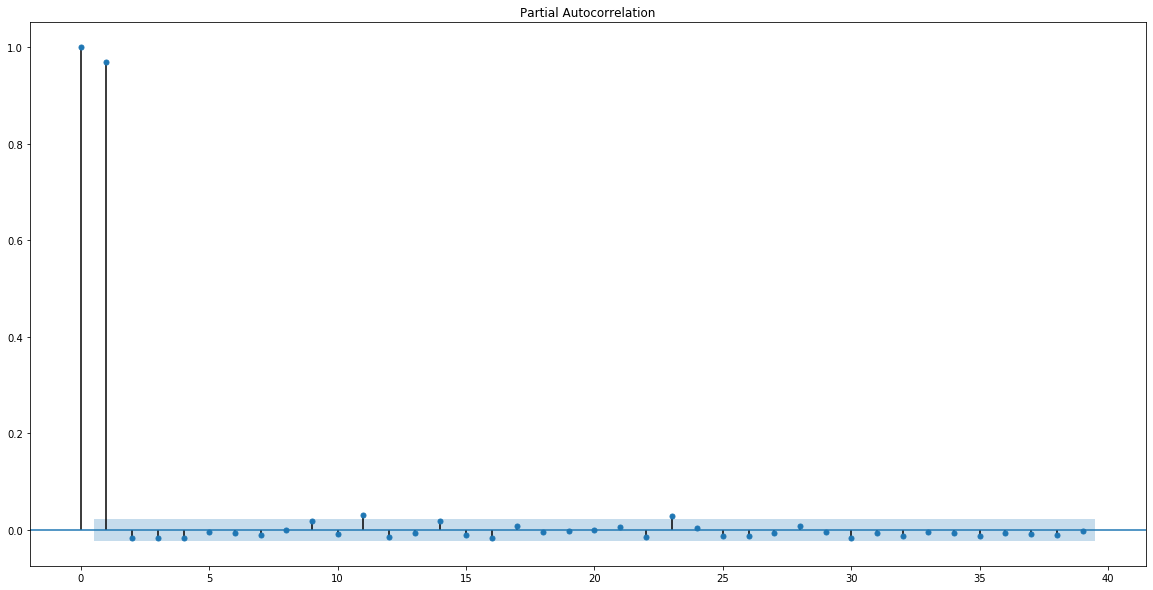

In [180]:
from statsmodels.graphics.tsaplots import plot_acf ,plot_pacf
from statsmodels.tsa.arima_model import ARIMA

plot_acf(df_forecast)
plot_pacf(df_forecast)

In [192]:
df_forecast

model = ARIMA(df_forecast ,order=(1,0,1)).fit(transparams=False)
results = model.fit(disp=-1)

AttributeError: 'ARMAResults' object has no attribute 'fit'

In [191]:
import statsmodels
statsmodels.__version__



'0.10.1'

In [162]:
import itertools

# Making a list of values for p,d & q
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))

In [164]:
import statsmodels.tsa.api as tsa

# Checking the AIC values per pairs
for param in pdq:
    mod = tsa.SARIMAX(df_forecast,order=param,enforce_stationarity=False,enforce_invertibility=False)
    results = mod.fit()
    print('ARIMA{} - AIC:{}'.format(param, results.aic))

ARIMA(0, 0, 0) - AIC:78140.35814775343
ARIMA(0, 0, 1) - AIC:68602.82444627155
ARIMA(0, 1, 0) - AIC:40350.30979966475
ARIMA(0, 1, 1) - AIC:40347.87195450501
ARIMA(1, 0, 0) - AIC:40345.527745177045
ARIMA(1, 0, 1) - AIC:40343.074177109884
ARIMA(1, 1, 0) - AIC:40352.309797462
ARIMA(1, 1, 1) - AIC:40349.87195500528


In [167]:
import statsmodels.api as sm

# Choosing the model with minimum AIC and the ARIMA Model for Time Series Forecasting
mod = sm.tsa.statespace.SARIMAX(df_forecast,order=(1,0,1))
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9969      0.002    575.208      0.000       0.994       1.000
ma.L1          0.0014      0.376      0.004      0.997      -0.736       0.739
sigma2        13.4385      0.042    317.007      0.000      13.355      13.522


In [171]:
# Predicting the future values and the confidence interval
pred = results.get_prediction(start=pd.to_datetime('2018-12-01'),end=pd.to_datetime('2019-04-01'),dynamic=False)
pred_ci = pred.conf_int()
pred.predicted_mean.round()

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'